# 使用 Logistic regression 預測 Titanic 乘客的存活機率  
### 李宛蒨

# 1. 讀入資料

In [2]:
import pandas as pd

# 讀入資料(Titanic_data)
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_data = pd.read_csv(url)

# 資料筆數、欄位
print(titanic_data.shape)
titanic_data.head(3) 

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2. 變數意義及選取

變數名稱         變數意義                符號代表  
1.survival      Survival              (0 = No; 1 = Yes)  
2.sex           Sex  
3.age           Age  
4.parch         Number of Parents/Children Aboard  
5.fare          Passenger Fare  
6.pclass        Passenger Class       (1 = 1st; 2 = 2nd; 3 = 3rd)  
*socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [3]:
# 描述性統計
titanic_data.describe() # 發現 Age 有 NaN

C:\Users\casey_000\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. 填補年齡的遺漏值  
### 使用相同的socio-economic status(Pclass)組別之中位數來填補Age變數的遺漏值。

(216, 12)
(184, 12)
(491, 12)
--------------------
       PassengerId    Survived  Pclass        Age       SibSp       Parch  \
count   216.000000  216.000000   216.0  216.00000  216.000000  216.000000   
mean    461.597222    0.629630     1.0   38.06213    0.416667    0.356481   
std     246.737616    0.484026     0.0   13.73797    0.611898    0.693997   
min       2.000000    0.000000     1.0    0.92000    0.000000    0.000000   
25%     270.750000    0.000000     1.0   29.00000    0.000000    0.000000   
50%     472.000000    1.000000     1.0   37.00000    0.000000    0.000000   
75%     670.500000    1.000000     1.0   47.25000    1.000000    0.000000   
max     890.000000    1.000000     1.0   80.00000    3.000000    4.000000   

             Fare  
count  216.000000  
mean    84.154687  
std     78.380373  
min      0.000000  
25%     30.923950  
50%     60.287500  
75%     93.500000  
max    512.329200  


C:\Users\casey_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


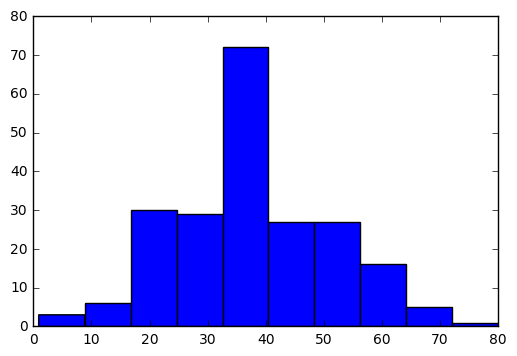

C:\Users\casey_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       PassengerId    Survived  Pclass         Age       SibSp       Parch  \
count   184.000000  184.000000   184.0  184.000000  184.000000  184.000000   
mean    445.956522    0.472826     2.0   29.825163    0.402174    0.380435   
std     250.852161    0.500623     0.0   13.575362    0.601633    0.690963   
min      10.000000    0.000000     2.0    0.670000    0.000000    0.000000   
25%     234.500000    0.000000     2.0   23.000000    0.000000    0.000000   
50%     435.500000    0.000000     2.0   29.000000    0.000000    0.000000   
75%     668.000000    1.000000     2.0   36.000000    1.000000    1.000000   
max     887.000000    1.000000     2.0   70.000000    3.000000    3.000000   

             Fare  
count  184.000000  
mean    20.662183  
std     13.417399  
min      0.000000  
25%     13.000000  
50%     14.250000  
75%     26.000000  
max     73.500000  


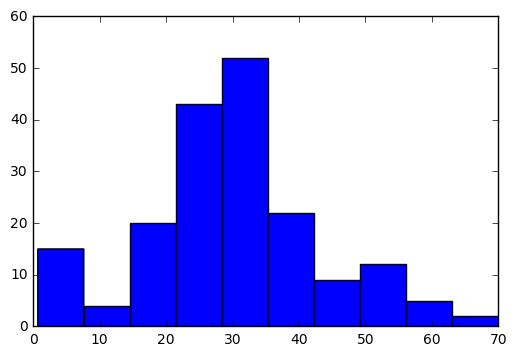

C:\Users\casey_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       PassengerId    Survived  Pclass         Age       SibSp       Parch  \
count   491.000000  491.000000   491.0  491.000000  491.000000  491.000000   
mean    439.154786    0.242363     3.0   24.824684    0.615071    0.393075   
std     264.441453    0.428949     0.0   10.632997    1.374883    0.888861   
min       1.000000    0.000000     3.0    0.420000    0.000000    0.000000   
25%     200.000000    0.000000     3.0   20.250000    0.000000    0.000000   
50%     432.000000    0.000000     3.0   24.000000    0.000000    0.000000   
75%     666.500000    0.000000     3.0   29.000000    1.000000    0.000000   
max     891.000000    1.000000     3.0   74.000000    8.000000    6.000000   

             Fare  
count  491.000000  
mean    13.675550  
std     11.778142  
min      0.000000  
25%      7.750000  
50%      8.050000  
75%     15.500000  
max     69.550000  


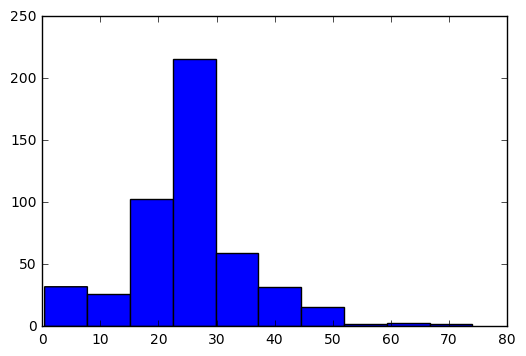

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
filter = titanic_data["Pclass"]==1
Pclass_age_1 = titanic_data[filter]
print(Pclass_age_1.shape)

filter = titanic_data["Pclass"]==2
Pclass_age_2 = titanic_data[filter]
print(Pclass_age_2.shape)

filter = titanic_data["Pclass"]==3
Pclass_age_3 = titanic_data[filter]
print(Pclass_age_3.shape)

print("--------------------")

Pclass1_age_median = np.nanmedian(Pclass_age_1["Age"]) # 要忽略 NaN
Pclass1_new_Age = np.where(Pclass_age_1["Age"].isnull(), Pclass1_age_median, Pclass_age_1["Age"])
Pclass_age_1["Age"] = Pclass1_new_Age
print(Pclass_age_1.describe())
plt.hist(Pclass_age_1["Age"])
plt.show()

Pclass2_age_median = np.nanmedian(Pclass_age_2["Age"]) # 要忽略 NaN
Pclass2_new_Age = np.where(Pclass_age_2["Age"].isnull(), Pclass2_age_median, Pclass_age_2["Age"])
Pclass_age_2["Age"] = Pclass2_new_Age
print(Pclass_age_2.describe())
plt.hist(Pclass_age_2["Age"])
plt.show()

Pclass3_age_median = np.nanmedian(Pclass_age_3["Age"]) # 要忽略 NaN
Pclass3_new_Age = np.where(Pclass_age_3["Age"].isnull(), Pclass3_age_median, Pclass_age_3["Age"])
Pclass_age_3["Age"] = Pclass3_new_Age
print(Pclass_age_3.describe())
plt.hist(Pclass_age_3["Age"])
plt.show()

### 合併資料集 Pclass1-Pclass3

In [18]:
titanic_data1= [Pclass_age_1,Pclass_age_2,Pclass_age_3]
titanic_data2 = pd.concat(titanic_data1)
print(titanic_data2.shape)
titanic_data2.describe()
#titanic_data2.head(3) 

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. 資料分析 Logistic regression
### 將類別變數轉換成 dummy variables


In [15]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
#survival sex age parch fare pclass
encoded_Sex = label_encoder.fit_transform(titanic_data2["Sex"])
encoded_Pclass = label_encoder.fit_transform(titanic_data2["Pclass"])

### 建立資料矩正 : X 與 Y

In [28]:
age=titanic_data2["Age"]
parch=titanic_data2["Parch"]
fare=titanic_data2["Fare"]

titanic_X = pd.DataFrame([encoded_Pclass,
                          encoded_Sex,
                          age,
                          parch,
                          fare                     
                         ]).T

titanic_y = titanic_data2["Survived"]

### 切分訓練與測試資料
使用變數Sex,Pclass,Age,parch,fare來預測Survived。  
並計算不同比例的訓練與測試資料之。

In [88]:
cut_list = range(1,10)

from sklearn import metrics, linear_model

for i in cut_list:
    if (i > 5):
        break
    else:
        trainX,testX,trainy,testy = train_test_split(titanic_X, titanic_y, test_size = i/10)
        # 建立模型
        logistic_regr = linear_model.LogisticRegression()
        logistic_regr.fit(trainX, trainy)

        # 預測
        test_y_predicted = logistic_regr.predict(testX)

        # 準確率
        accuracy = metrics.accuracy_score(testy, test_y_predicted)
        

        print("訓練資料比例",i/10,"準確率",accuracy)



訓練資料比例 0.1 準確率 0.811111111111
訓練資料比例 0.2 準確率 0.826815642458
訓練資料比例 0.3 準確率 0.828358208955
訓練資料比例 0.4 準確率 0.798319327731
訓練資料比例 0.5 準確率 0.789237668161
